Autorun Version is 23


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


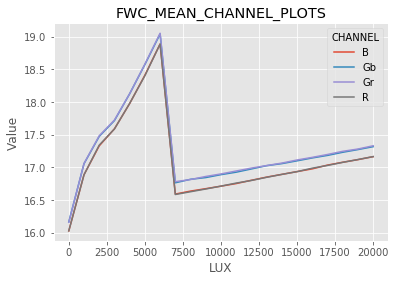

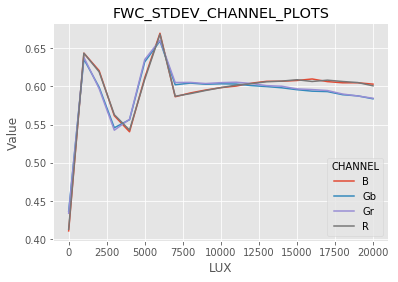

The FWC illumination should be 12000 LUX


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path
%matplotlib inline
import csv
#import re
import seaborn as sns.set()
plt.style.use('ggplot')

file_path = r'P:\BACKUP\VPE\Shreyas\Tools\PyTools\FWC_Shmoo'

file_name = r'SPD_One_Die_FWC.csv'

fwc = pd.read_csv(file_path+'\\'+ file_name)
fwc.columns = fwc.columns.str.replace(' ','')
try:
    fwc['DIEID'] = fwc['DIE_X'].astype(str)+fwc['DIE_Y'].astype(str)    
    fwc = pd.melt(fwc, id_vars=['Parameter','SBIN','HBIN','DIE_X','DIE_Y','SITE','TP_VERSION','TIME','LOT_ID','WAFER_ID','DIEID','RD_SETTING_VER'])
except:
    print('Please match the Columns in List to data file')
fwc['AUTORUN_VER_BOOL'] = fwc['variable'].str.contains('AUTORUN|TOTAL_TESTS', regex=True)

fwc.replace(r'\s+', np.nan, regex=True)
fwc.dropna(inplace= True)

def AUTORUN_VER(file):
    file = file[file['AUTORUN_VER_BOOL'] == True]
    file['AUTORUN_VER_BOOL'] = file['variable'].str.contains('AUTORUN', regex=True)
    file = file[file.AUTORUN_VER_BOOL == True]
    file['AUTORUN'] = file.variable.str.extract('(\d+)').astype(int)
    AutoRun_Ver = str(file.AUTORUN.unique())
    print('Autorun Version is '+ AutoRun_Ver[1:-1])
    
AUTORUN_VER(fwc)

fwc = fwc[fwc['AUTORUN_VER_BOOL'] == False]
    
fwc['LUX'] = fwc.variable.str.extract('(\d+)').astype(int)
def GET_CHANNELS(file):
    #file = fwc
    file['CHANNEL'] = file.variable.str.split('_').str[-1]
    channels = str(file.CHANNEL.unique())
    channels = channels.split(' ')
    return(file)
    return(channels)

GET_CHANNELS(fwc)

fwc['LUX']=fwc['LUX'].astype(int)
fwc['value']=fwc['value'].astype(float)

fwc_mean = fwc[fwc.variable.str.contains('Mean')]
fwc_std = fwc[fwc.variable.str.contains('Std')]

#abc = fwc_std.pivot_table(index='LUX',columns='CHANNEL',values='value',fill_value='scalar').plot()

#display(abc)

#def PLOT_FWC(file,plot_type):
    #print(type(file))
    #file.info()
    file.pivot_table(index='LUX',columns='CHANNEL',values='value',fill_value='scalar').plot()
    #file = file.pivot(index='LUX',columns = 'CHANNEL', values = 'value').plot(legend=False)
    plt.title(plot_type +'_CHANNEL_PLOTS', color = 'black')
    plt.xlabel('LUX')
    plt.ylabel('Value')
    plt.show()
def PLOT_FWC(file,plot_type):
    #print(type(file))
    #file.info()
    file.pivot_table(index='LUX',columns='CHANNEL',values='value',fill_value='scalar').plot()
    #file = file.pivot(index='LUX',columns = 'CHANNEL', values = 'value').plot(legend=False)
    plt.title(plot_type +'_CHANNEL_PLOTS', color = 'black')
    plt.xlabel('LUX')
    plt.ylabel('Value')
    plt.show()
    
PLOT_FWC(fwc_mean,'FWC_MEAN')
PLOT_FWC(fwc_std,'FWC_STDEV')

def MAX_LUX(file):
    abc = file.pivot_table(index='LUX',columns='CHANNEL',values='value')
    max_2 = abc['Gr'].argmax()
    print('The FWC illumination should be '+ str(2*int(max_2))+' LUX')
    
MAX_LUX(fwc_std)

#try:
#    fwc.to_csv(file_path +'\\'+'Debug.csv')
#except:
#    print('Close Debug.csv file')

In [ ]:
fwc['LUX'] = fwc.variable.str.extract('(\d+)').astype(float)
fwc.dropna(axis='rows')
    
fwc['VC']= file['variable'].str[7:10]
    vc = str(file.VC.unique())
    file['CHANNEL'] = np.where(file['variable'].str[-2:-1] == "_",
                                    file['variable'].str[-1:],
                                    file['variable'].str[-2:])
    #file.to_csv(LCG_path+'\\'+'Debug.csv')
    #file[file.LUX.apply(lambda x: x.isnumeric())]
    file[file.LUX.str.isnumeric()]
    
    channels = file.CHANNEL.unique()
    #print (channels)
    for channel in channels:
        locals()['file_{}'.format(channel)] = file.loc[file['CHANNEL']== channel]
    #print(file_gr)
    plt.style.use('ggplot')

    for channel in channels:
        locals()['file_{}_pvt'.format(channel)] = locals()['file_{}'.format(channel)].pivot(index='LUX',columns = 'DIEID', values = 'value').plot(legend=False)
        plt.title('file_'+channel+'_DIE_PLOTS', color = 'black')
        plt.xlabel('LUX')
        plt.ylabel('Value')
        plt.show()
        
#paths = [hcg_mean, hcg_stdev, lcg_mean, lcg_stdev]

#strmap = map(str,[paths])
#strmap = str(paths).strip('[]')
#for i in strmap:
    #print(i)

#global paths
#global lcg_mean
#global lcg_stdev
#global hcg_mean
#global hcg_stdev

#for file in paths:
#print(file.name)

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib
import numpy as np
import os.path
%matplotlib inline
import csv
#import re
import seaborn as sns
plt.style.use('ggplot')

file_path = r'P:\BACKUP\VPE\Shreyas\Tools\PyTools\FWC_Shmoo'

file_name = r'X00000-00X0_SLT2.csv'

fwc = pd.read_csv(file_path+'\\'+ file_name)

try:
    fwc['DIEID'] = fwc['DIE_X'].astype(str)+fwc['DIE_Y'].astype(str)
    fwc = pd.melt(fwc, id_vars=['Parameter','SBIN','HBIN','DIE_X','DIE_Y','SITE','TP_VERSION','TIME','LOT_ID','WAFER_ID','DIEID',' RD_SETTING_VER'])
except:
    print('Please match the Columns in List to data file')
    
fwc['AUTORUN_VER_BOOL'] = fwc['variable'].str.contains('AUTORUN|TOTAL_TESTS', regex=True)
#print(type(fwc['AUTORUN_VER_BOOL']))
fwc.replace(r'\s+', np.nan, regex=True)
fwc.dropna(inplace= True)

try:
    fwc_mean.to_csv(file_path +'\\'+'Debug2.csv')
except:
    print('Close Debug.csv file')

def AUTORUN_VER(file):
    file = file[file['AUTORUN_VER_BOOL'] == True]
    file['AUTORUN_VER_BOOL'] = file['variable'].str.contains('AUTORUN', regex=True)
    file = file[file.AUTORUN_VER_BOOL == True]
    file['AUTORUN'] = file.variable.str.extract('(\d+)').astype(int)
    AutoRun_Ver = str(file.AUTORUN.unique())
    print('Autorun Version is '+ AutoRun_Ver[1:-1])
    
AUTORUN_VER(fwc)

fwc = fwc[fwc['AUTORUN_VER_BOOL'] == False]

def GET_CHANNELS(file):
    #file = fwc
    file['CHANNEL'] = file.variable.str.split('_').str[-1]
    channels = str(file.CHANNEL.unique())
    channels = channels.split(' ')
    #print(channels)
    return(file)
    return(channels)

try:
    fwc.to_csv(file_path +'\\'+'Debug2.csv')
except:
    print('Close Debug.csv file')
    
fwc['LUX'] = fwc.variable.str.extract('(\d+)').astype(int)


GET_CHANNELS(fwc)

fwc_mean = fwc[fwc.variable.str.contains('Mean')]
fwc_std = fwc[fwc.variable.str.contains('Std')]
channels = str(fwc_mean.CHANNEL.unique())
#channels = channels.str.extract('(\s+)').tolist()
channels = channels.split(' ')


print(channels)
#pd.to_numeric(fwc_mean)
print(type(fwc['value']))
fwc_mean.pivot(index='LUX',columns ='CHANNEL', values = 'value').plot()#(legend=False)

#abc = fwc_std.pivot(index='LUX',columns ='CHANNEL', values = 'value').plot()
#abc = fwc_std.pivot_table(fwc_std,values= 'value',index='LUX',columns ='CHANNEL',  aggfunc='mean')
#print(abc)

#def PLOT_FWC(file):
 #   for channel in channels:
  #      file = file.pivot(index='LUX',columns = 'CHANNEL', values = 'value').plot(legend=False)
   #     plt.title('file_'+channel+'_DIE_PLOTS', color = 'black')
    #    plt.xlabel('LUX')
     #   plt.ylabel('Value')
      #  plt.show()
        
#PLOT_FWC(fwc_mean)


#if fwc['AUTORUN_VER_BOOL'] == True:
#    try:
#        fwc['AUTORUN_VER'] = fwc.variable.str.extract('(\d+)').astype(float)
        
#    except:
#        fwc['AUTORUN_VER'] = 'Pass'
#else:
#    pass

#    
#if fwc['variable'].str.contains('AUTORUN', regex=True):
    #fwc['AUTORUN'] = 1
    #fwc['AUTORUN_VER'] = fwc.variable.str.extract('(\d+)').astype(float)
#else:
    #fwc['AUTORUN'] = 0
    #pass
    
#try:
#    fwc_mean.to_csv(file_path +'\\'+'Debug1.csv')
#except:
#    print('Close Debug.csv file')
#try:
#    fwc.to_csv(file_path +'\\'+'Debug.csv')
#except:
#    print('Close Debug.csv file')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


Autorun Version is 55


ValueError: cannot convert float NaN to integer